In [13]:
import numpy as np
import matplotlib.pyplot as plt
import quaternion

from fractal_printer import distance_functions as df

Resolution: 0.049
range(0, 54, 27)
range(0, 72, 9)
range(0, 78, 3)
range(0, 80)


<Figure size 640x480 with 0 Axes>

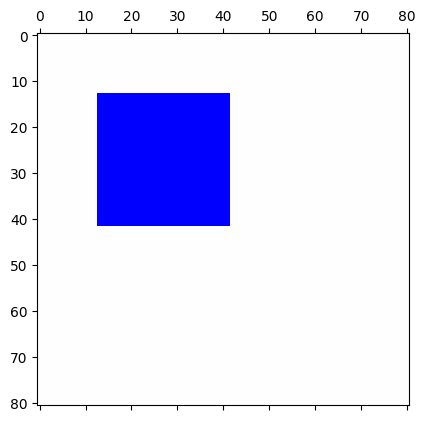

<Figure size 640x480 with 0 Axes>

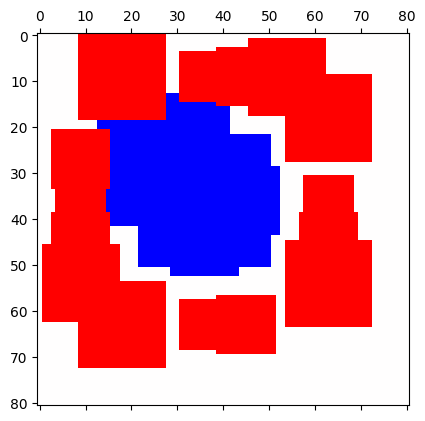

<Figure size 640x480 with 0 Axes>

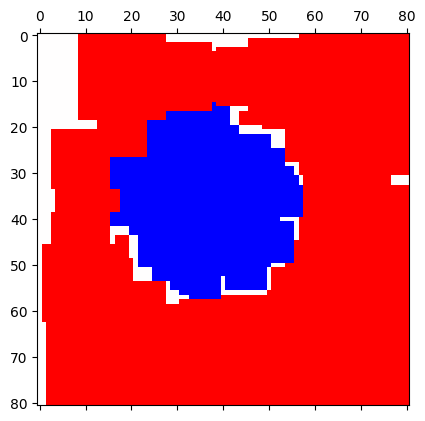

<Figure size 640x480 with 0 Axes>

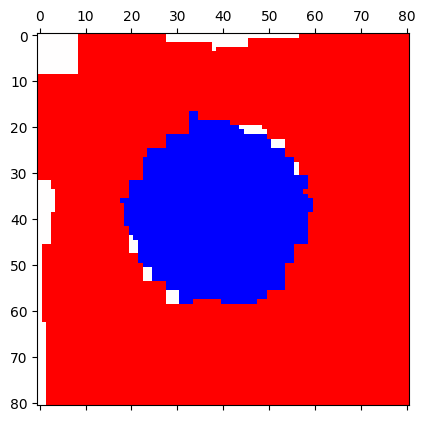

In [52]:
size = 2
origin = np.quaternion(0,-1,-1,-1) * size/2
levels = 4
steps = 3**levels

resolution = size/steps
print(f"Resolution: {(2*size)/steps:.2g}")

mask = np.zeros((steps,steps,steps),dtype=np.int8)

for n in range(levels-1,-1,-1):
    stride = 3**n
    points = range(0,steps-stride,stride)
    print(points)
    for i in points:
        for j in points:
            for k in points:
                if mask[i,j,k] == 0:
                    z = np.quaternion(0,i, j, k)*resolution + origin + np.quaternion(0,1,1,1)*stride/2*resolution
                    d = df.sphere(z,radius = 0.5)
                    radius = int(np.floor(np.abs(d)/np.sqrt(2)/resolution))
                    if radius > 0:
                        mask[i-radius:i+radius+1,j-radius:j+radius+1,k-radius:k+radius+1] = np.sign(d)
    plt.figure()
    plt.matshow(mask[:,:,steps//2],vmin=-1,vmax=1,cmap="bwr")


In [44]:
foo = np.zeros(10)
foo[5-2:5+2+1] = 1  
foo

array([0., 0., 0., 1., 1., 1., 1., 1., 0., 0.])